# Kako simuliramo?
Ker je glavna ideja projekta bolj interaktiven način učenja, smo se odločili da bomo primere snovi dejansko simulirali. Načinov integracije je več, vsak od njih pa ima svoje prednosti in slabosti. Glavni cilj simulacije je seveda natančnost. Zaradi enostavnosti smo simulacije začeli z direktno integracijo diferencialnih enačb (knjižnjico scipy).

## Primer - eksponentno pojemanje
V spodnjem odseku kode je prikazan preprost primer preverjanja natančnosti simulacije z eksponentnim pojemanjem. Uporabili smo preprosto funkcijo:

```{math}
y(x) = e^{-x}\to y'(x) = -e^{-x} = -y(x).
```

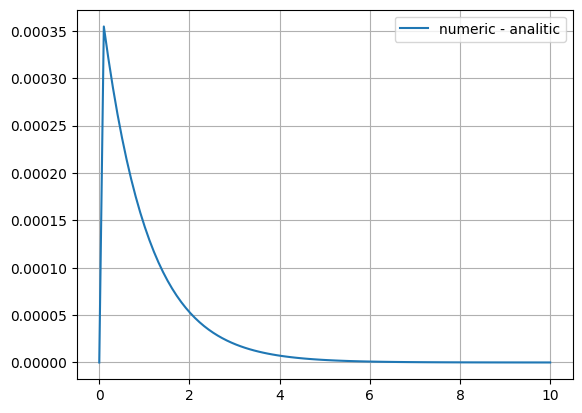

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import e
from scipy.integrate import solve_ivp

t_start, t_end, dt = 0, 10, 0.1
t_eval = np.linspace(t_start, t_end, int((t_end - t_start) / dt))

def exp(t, y):
    return -y

result_exp = solve_ivp(exp, (t_start, t_end), [1], t_eval = t_eval, max_step = 0.02, method='LSODA')
plt.plot(t_eval, result_exp.y[0] - [e**(-x) for x in t_eval], label='numeric - analitic')
plt.legend()
plt.grid()
plt.show()

Kot vidimo na grafu, je kljub časovnem koraku 0,1 sekunde simulacija natančna do več kot 0,1%. Toda mi bomo simulirali tudi bolj komplicirane (sestavljene) fizikalne koncepte (na primer energijo, ki bi radi da se čim bolj ohranja).

## Primer - harmonski oscilator
Najbolj enostaven fizikalni primer za testiranje več konceptov je seveda harmonski oscilator.

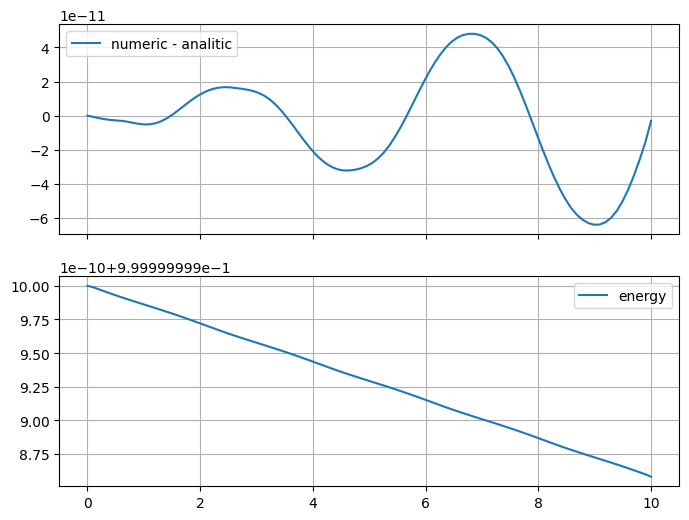

In [2]:
K, M = 2, 1

def hooke(t, X):
    x, v = X
    return [v, -K * x / M]

result_lho = solve_ivp(hooke, (t_start, t_end), [1, 0], t_eval = t_eval, max_step=0.02)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

ax1.plot(t_eval, result_lho.y[0] - np.cos(np.sqrt(K / M) * t_eval), label='numeric - analitic')
ax1.grid()
ax1.legend()

ax2.plot(t_eval, 0.5 * M * result_lho.y[1]**2 + 0.5 * K * result_lho.y[0]**2, label='energy')
ax2.grid()
ax2.legend()

plt.show()

Kot pri eksponentnem pojemanju lahko opazimo, da je rešitev podobno zelo natančna, kljub velikemu časovnemu koraku. Toda hkrati opazimo še, da se energija sistema manjša - to je v resnici zaželjeno, saj sistem tako po dolgem času ne bo divergiral (eksplodiral).

## Primer - sistem dveh teles
Tu srečamo prvi primer interakcijskega okna. Uporabnik lahko spremeni začetni lokaciji in hitrosti posameznih objektov in nato prične simulacijo, ter na koncu prosto pogleda rezultat.

In [3]:
import ipywidgets as widgets
from IPython.display import display

# Slider
slider = widgets.IntSlider(value=50, min=0, max=100, description='Vrednost:')

# Funkcija, ki resetira slider
def reset_slider(b):
    slider.value = 50

# Gumb
button = widgets.Button(description='Reset')
button.on_click(reset_slider)

# Prikaz
display(slider, button)


IntSlider(value=50, description='Vrednost:')

Button(description='Reset', style=ButtonStyle())